    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


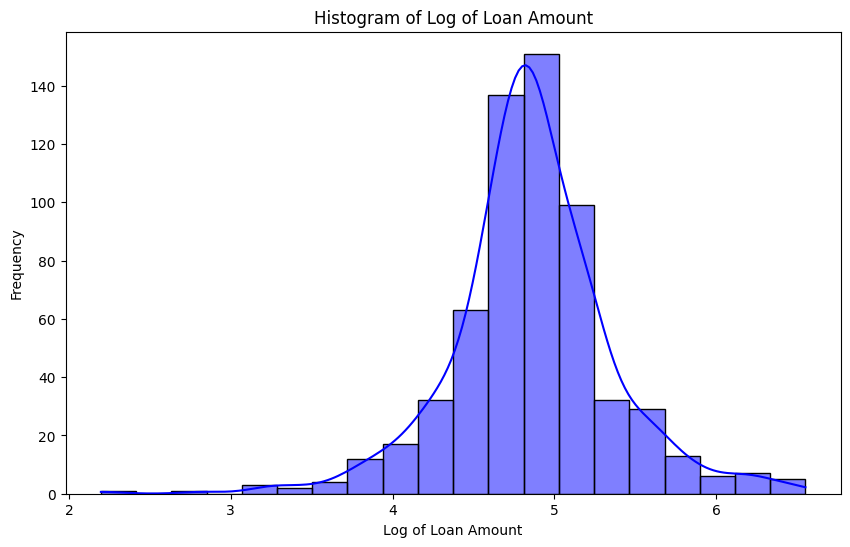

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

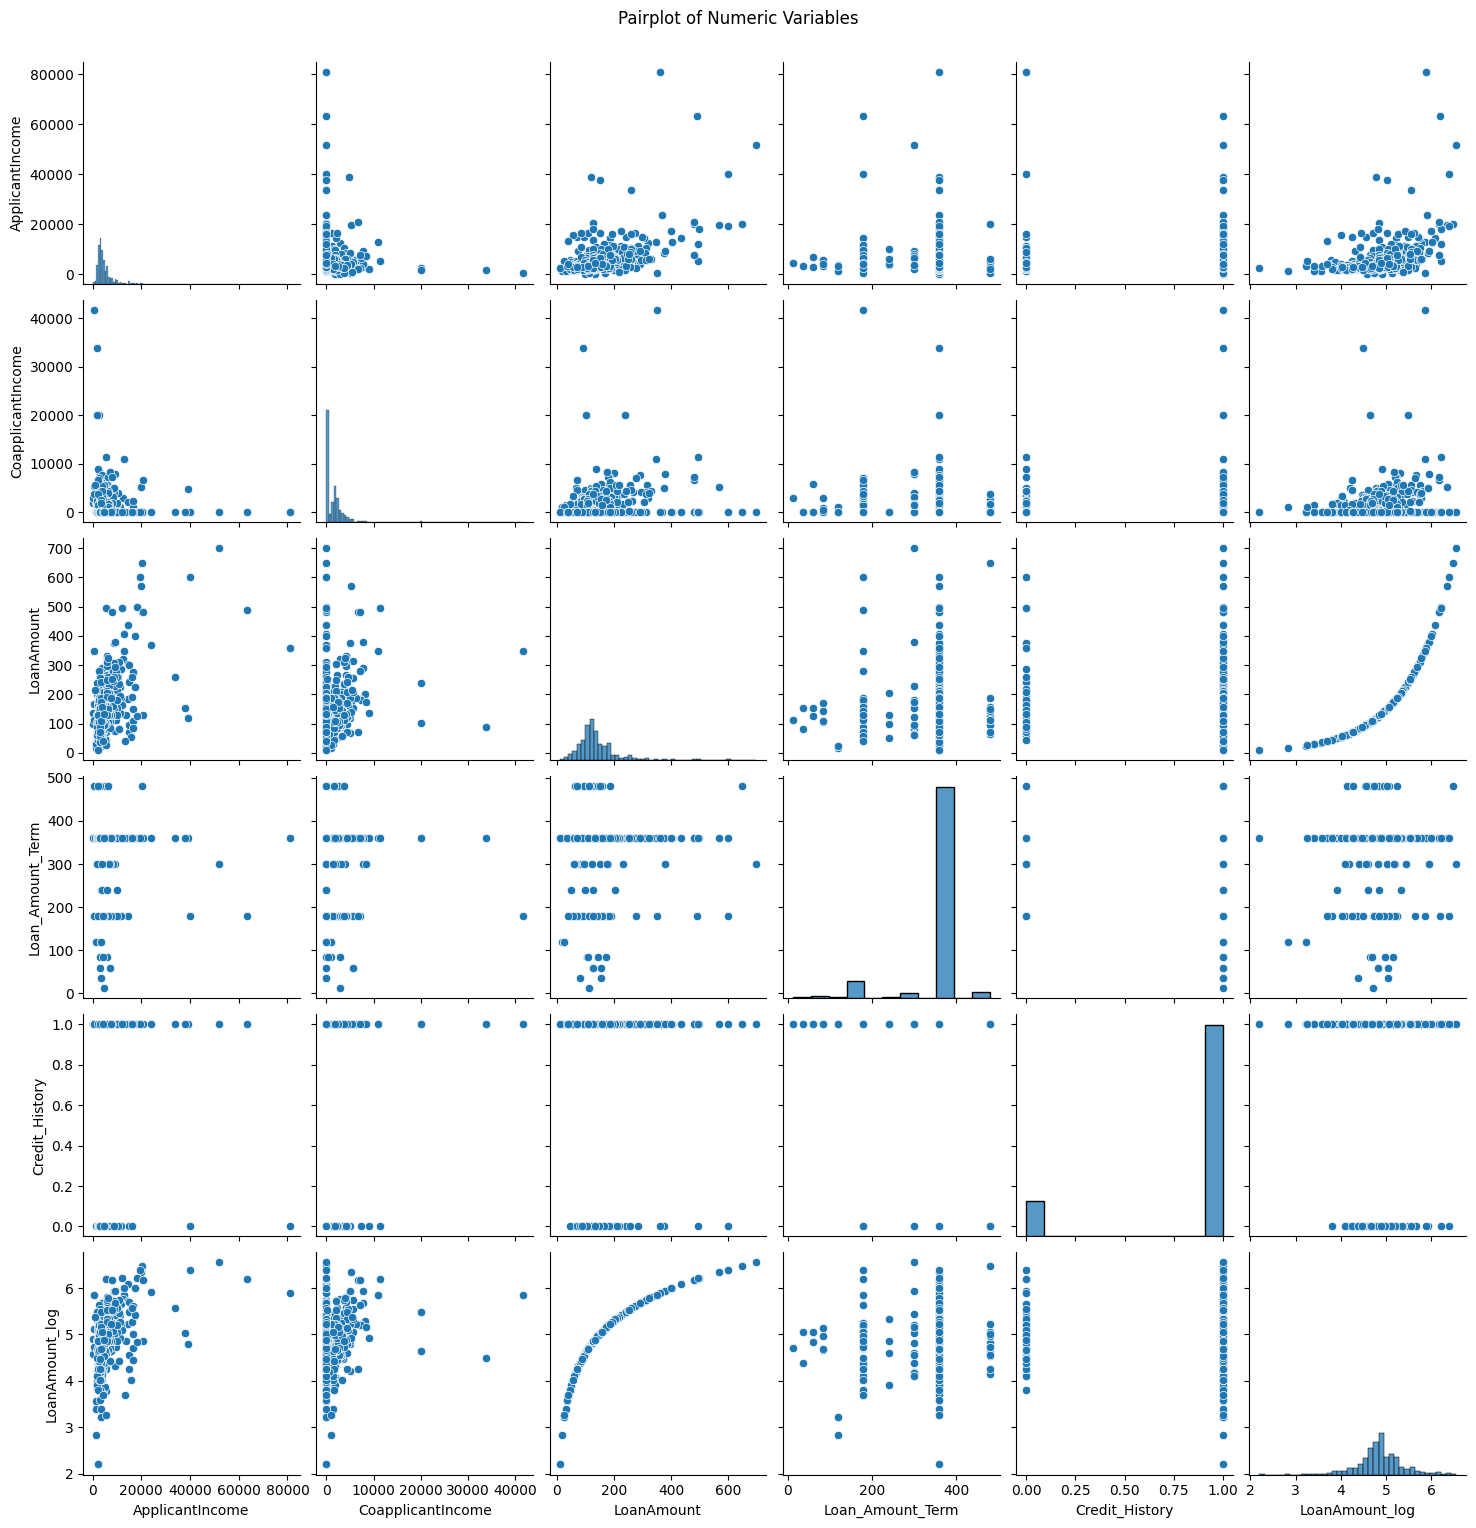

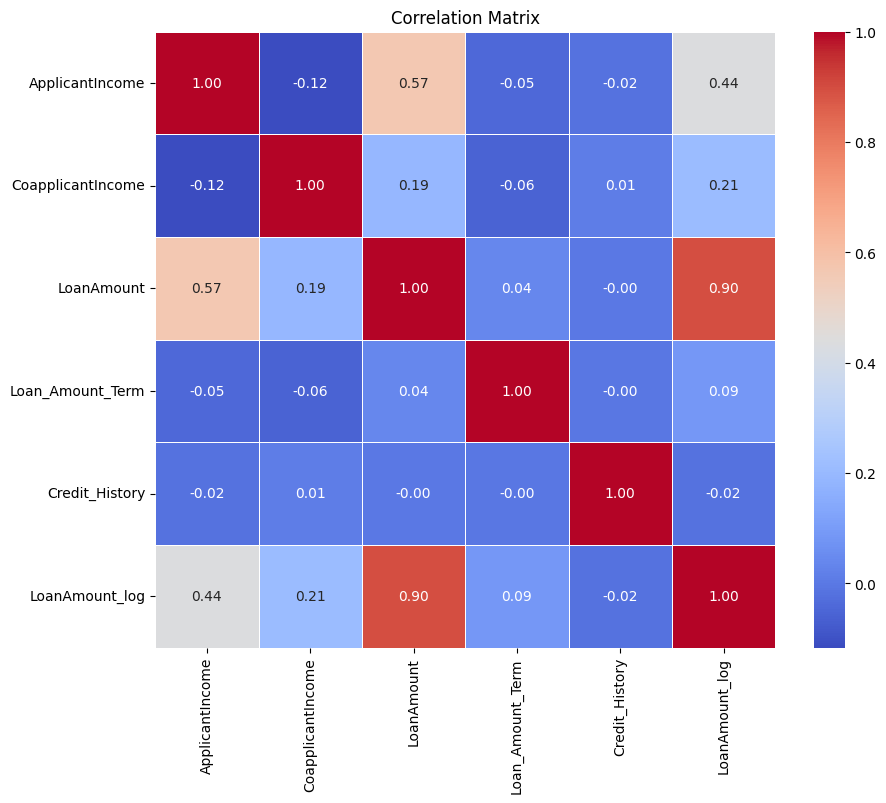

Loan Approval: Approved


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Function to predict loan approval
def predict_loan_approval(applicant_income, coapplicant_income, loan_amount, loan_amount_term, credit_history):
    # Load the model (assuming it has been trained and saved previously)
    # Example: rf_model = joblib.load('random_forest_model.pkl')
    # Here, we assume rf_model is already defined in the global scope (as in previous example)
    
    # Prepare input data as a DataFrame
    input_data = pd.DataFrame({
        'ApplicantIncome': [applicant_income],
        'CoapplicantIncome': [coapplicant_income],
        'LoanAmount_log': [np.log(loan_amount)],  # Assuming log transformation is used
        'Loan_Amount_Term': [loan_amount_term],
        'Credit_History': [credit_history]
    })
    
    # Standardize input data
    input_data_scaled = scaler.transform(input_data)
    
    # Make predictions
    prediction = rf_model.predict(input_data_scaled)
    
    # Interpret prediction
    if prediction[0] == 1:
        return "Approved"
    else:
        return "Rejected"

# Read the Excel file into a DataFrame
df = pd.read_excel("C:\\Users\\Lenovo\\Downloads\\loan data.xlsx")

# Basic data exploration
print(df.head())
print(df.info())

# Handling missing values
missing_counts = df.isnull().sum()
print("Missing values count:")
print(missing_counts)

# Fill missing values in categorical columns with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Feature engineering
df['LoanAmount_log'] = np.log(df['LoanAmount'])

# Visualizations

# Histogram of 'LoanAmount_log'
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanAmount_log'], bins=20, kde=True, color='blue')
plt.title('Histogram of Log of Loan Amount')
plt.xlabel('Log of Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Pairplot for numeric variables
numeric_columns = df.select_dtypes(include=[np.number]).columns
sns.pairplot(df[numeric_columns])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Machine Learning Model (Random Forest Classifier) example
# Prepare data for modeling
X = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount_log', 'Loan_Amount_Term', 'Credit_History']]
y = df['Loan_Status'].replace({'Y': 1, 'N': 0})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Example usage of loan approval prediction function
applicant_income = 5000
coapplicant_income = 2000
loan_amount = 150000
loan_amount_term = 360
credit_history = 1

loan_approval = predict_loan_approval(applicant_income, coapplicant_income, loan_amount, loan_amount_term, credit_history)
print(f"Loan Approval: {loan_approval}")


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
# Function to predict loan approval
def predict_loan_approval(applicant_income, coapplicant_income, loan_amount, loan_amount_term, credit_history):
    # Load the model (assuming it has been trained and saved previously)
    # Example: rf_model = joblib.load('random_forest_model.pkl')
    # Here, we assume rf_model is already defined in the global scope (as in previous example)
    
    # Prepare input data as a DataFrame
    input_data = pd.DataFrame({
        'ApplicantIncome': [applicant_income],
        'CoapplicantIncome': [coapplicant_income],
        'LoanAmount_log': [np.log(loan_amount)],  # Assuming log transformation is used
        'Loan_Amount_Term': [loan_amount_term],
        'Credit_History': [credit_history]
    })
    
    # Standardize input data
    input_data_scaled = scaler.transform(input_data)
    
    # Make predictions
    prediction = rf_model.predict(input_data_scaled)
    
    # Interpret prediction
    if prediction[0] == 1:
        return "Approved"
    else:
        return "Rejected"


In [3]:
# Read the Excel file into a DataFrame
df = pd.read_excel("C:\\Users\\Lenovo\\Downloads\\loan data.xlsx")

# Basic data exploration
print(df.head())
print(df.info())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [4]:
# Handling missing values
missing_counts = df.isnull().sum()
print("Missing values count:")
print(missing_counts)

# Fill missing values in categorical columns with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


Missing values count:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
# Feature engineering
df['LoanAmount_log'] = np.log(df['LoanAmount'])


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


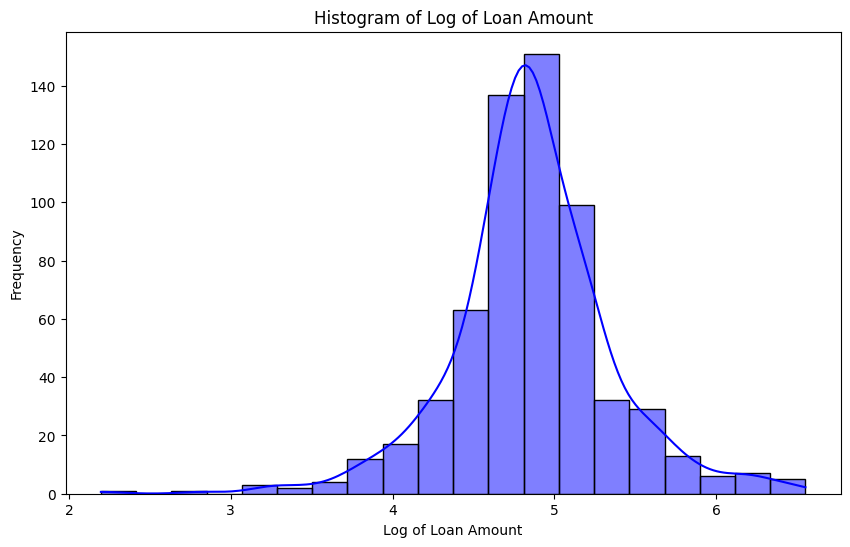

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

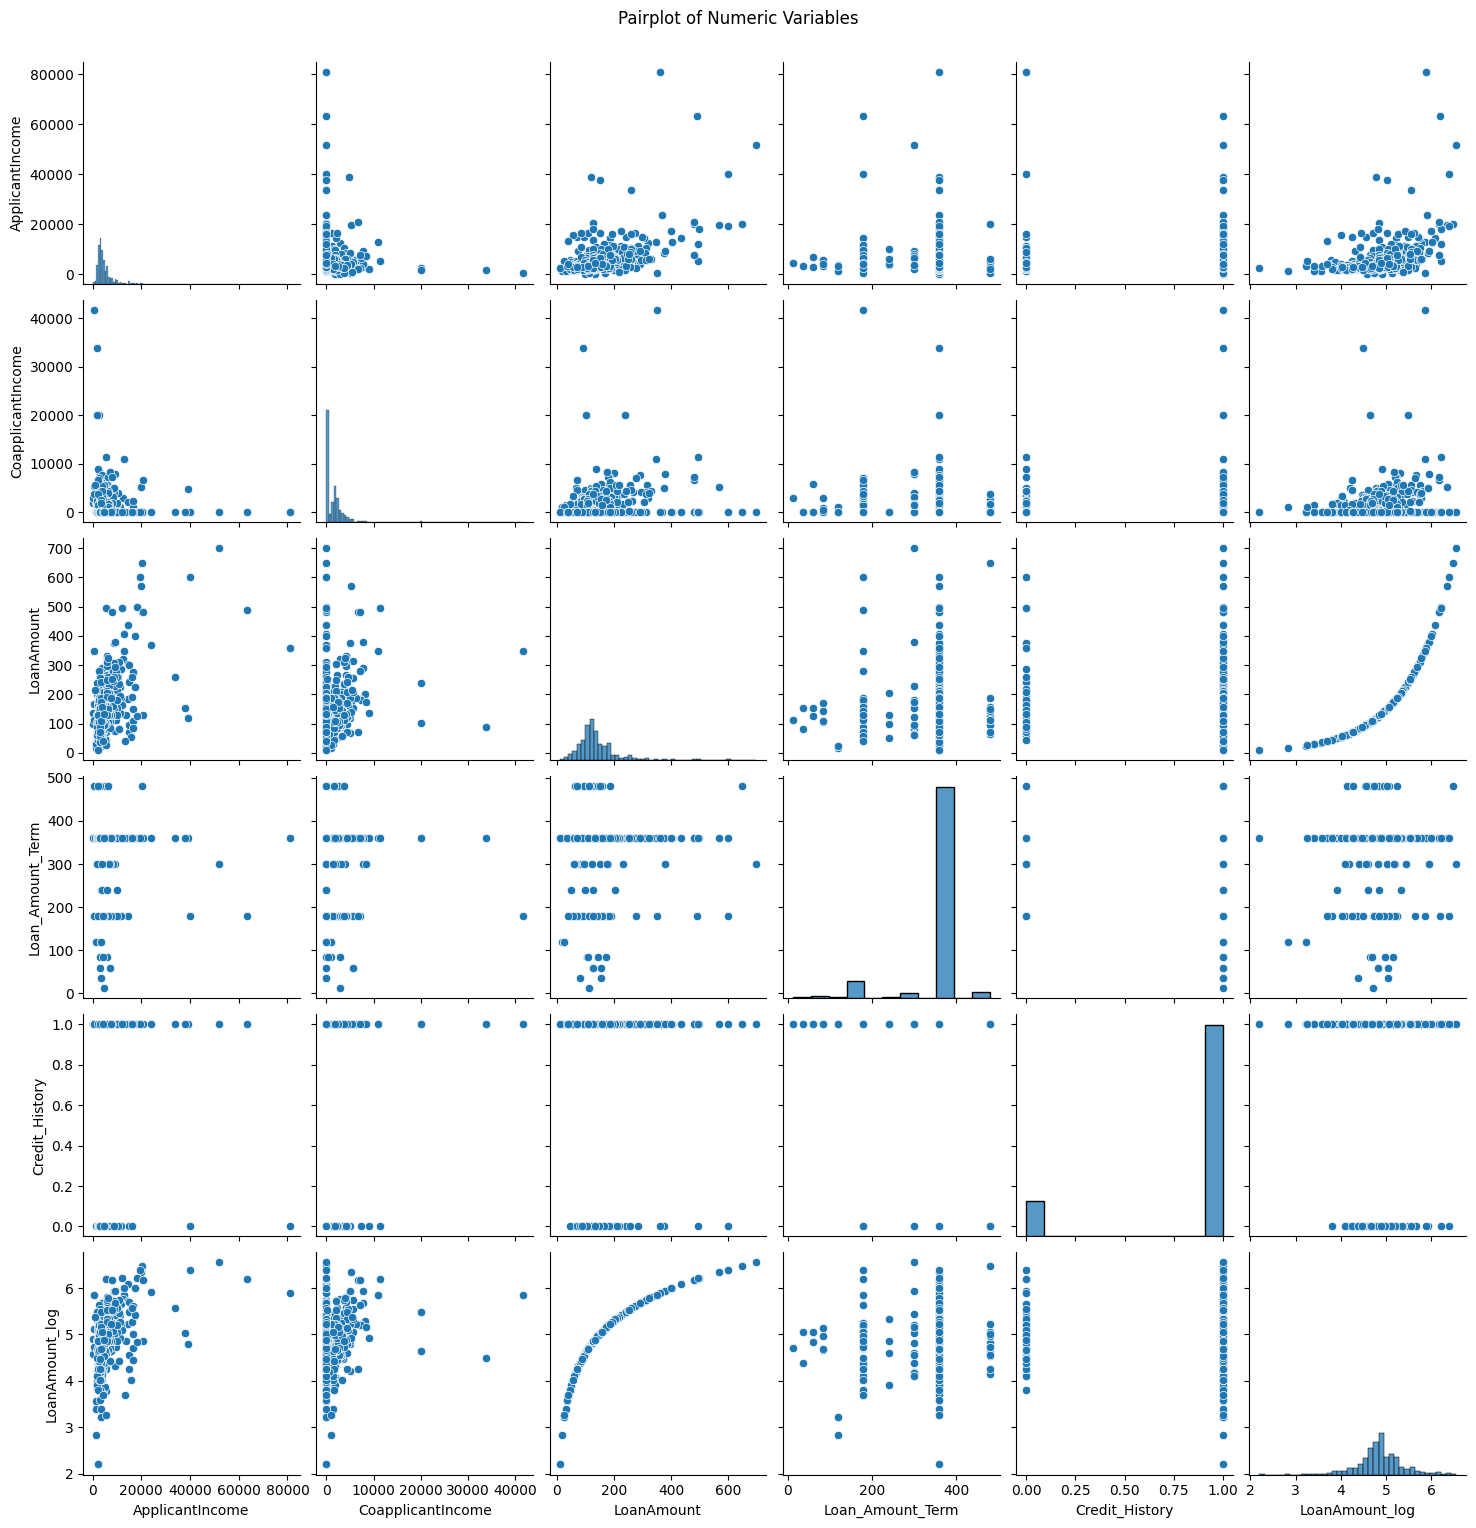

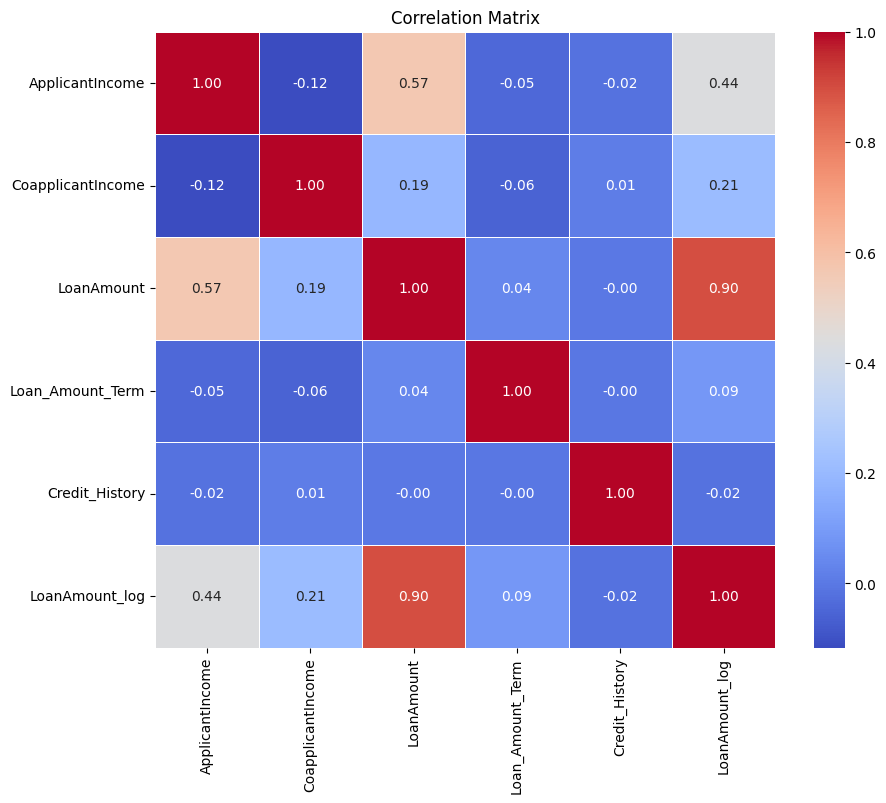

In [6]:
# Visualizations

# Histogram of 'LoanAmount_log'
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanAmount_log'], bins=20, kde=True, color='blue')
plt.title('Histogram of Log of Loan Amount')
plt.xlabel('Log of Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Pairplot for numeric variables
numeric_columns = df.select_dtypes(include=[np.number]).columns
sns.pairplot(df[numeric_columns])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [7]:
# Machine Learning Model (Random Forest Classifier) example
# Prepare data for modeling
X = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount_log', 'Loan_Amount_Term', 'Credit_History']]
y = df['Loan_Status'].replace({'Y': 1, 'N': 0})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)